In [192]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.io
import os
import seaborn as sns

from skimage.io import imread
from glob import glob
from tqdm import tqdm


In [2]:
dataTrainPath="Data/stage1_train/"
dataTestPath="Data/stage1_test/"

# Get train and test IDs
train_ids = next(os.walk(dataTrainPath))[1]
test_ids = next(os.walk(dataTestPath))[1]

In [182]:
def check_data_folder(path):
    print("Checking the {}".format(path))
    root, dirs, files = os.walk(path).__next__()
    print("Each directory contains the directories")
    print(os.listdir(root+dirs[0]))    
    print("Therea are ... {} images".format(len(dirs)))    
    # Checking the mask
    try:
        masks_count = 0
        for dir_img in dirs:
            masks_count+= len(os.walk(root + dir_img + "/masks/").__next__()[2])
        print("Total ... {} images of masks".format(masks_count))
    except:
        print("The Test folder contain only images")

In [183]:
# Checking the Training folder
check_data_folder(dataTrainPath)

Checking the Data/stage1_train/
Each directory contains the directories
['images', 'masks']
Therea are ... 670 images
Total ...: 29461 images of masks


In [184]:
# Test folder
check_data_folder(dataTestPath)

Checking the Data/stage1_test/
Each directory contains the directories
['images']
Therea are ... 65 images
The Test folder contain only images


This is an image


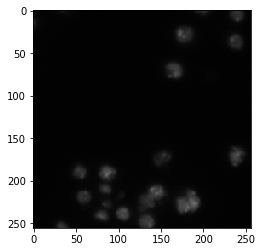

In [186]:
root,dirs,files=os.walk(dataTrainPath).__next__()
rIm,dIm,fIm=os.walk(root+dirs[0]+"/images/").__next__()
print("This is an image")
img = mpimg.imread(rIm + fIm[0])
plt.imshow(img)
plt.show()

There are multiple masks for one image file

Corresponding masks


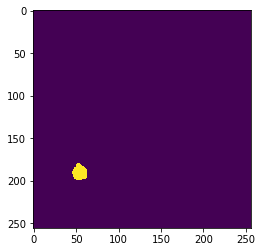

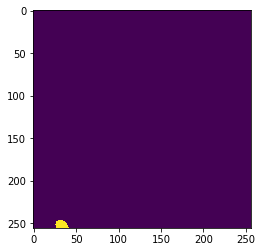

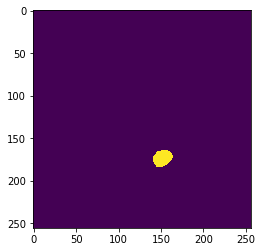

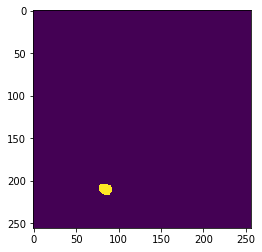

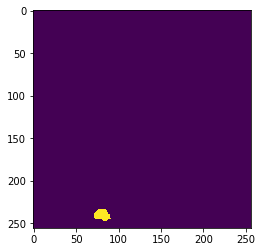

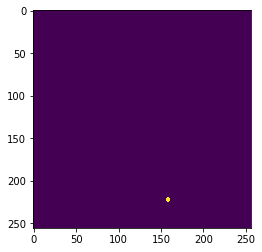

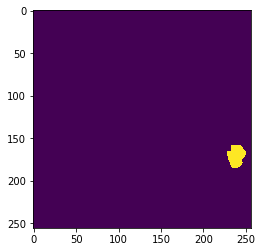

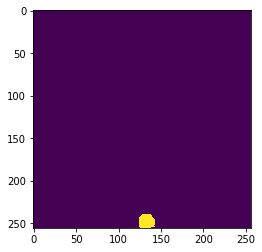

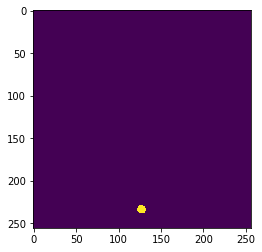

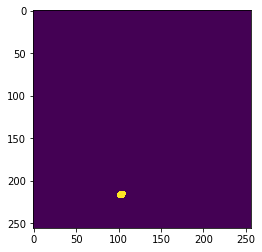

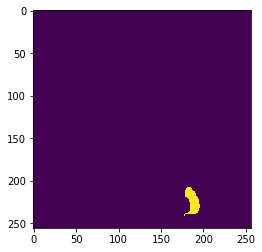

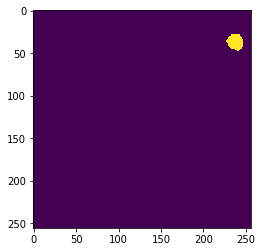

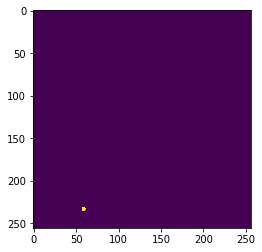

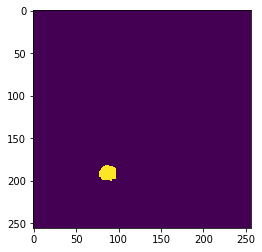

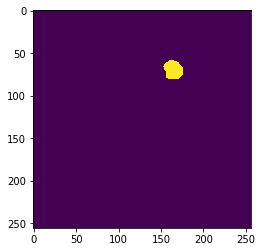

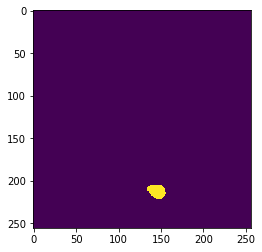

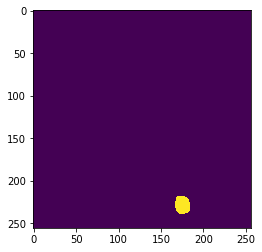

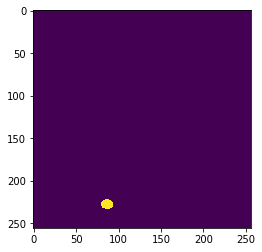

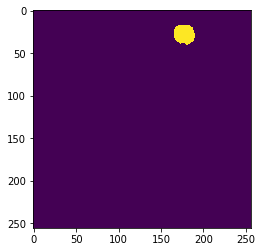

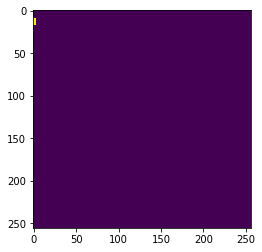

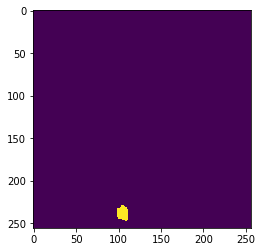

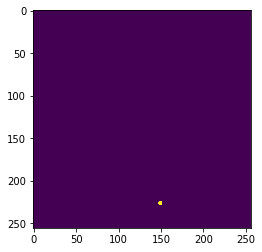

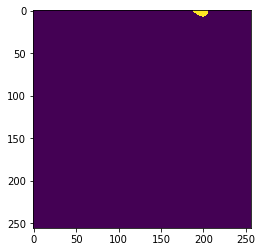

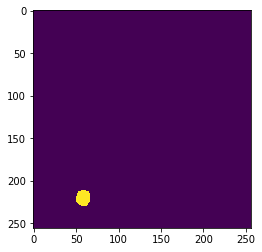

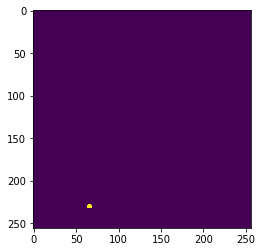

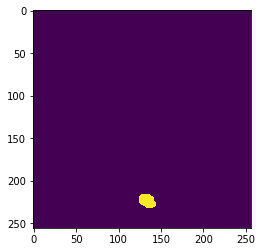

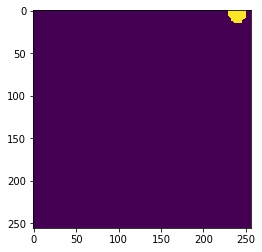

In [188]:
rMasks,dMasks,fMasks=os.walk(root+dirs[0]+"/masks/").__next__()
print("Corresponding masks")
for mask in fMasks:
    iMask = mpimg.imread(rMasks + mask)
    plt.imshow(iMask)
    plt.show()

In [189]:
maskList = [rMasks + mask for mask in fMasks]
masksJoin = skimage.io.imread_collection(maskList).concatenate()
#number of masks, dimension1, dimension2
print("Shape of this squashed masks ndarray: ", masksJoin.shape)

Shape of this squashed masks ndarray:  (27, 256, 256)


All masks:


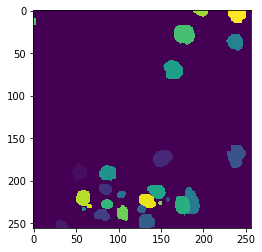

In [190]:
labels = np.zeros((masksJoin.shape[1],masksJoin.shape[2]), np.uint16)

for i in range(masksJoin.shape[0]):
    labels[masksJoin[i]>0]=i+1

print("All masks:")
plt.imshow(labels)
plt.show()

Image: 


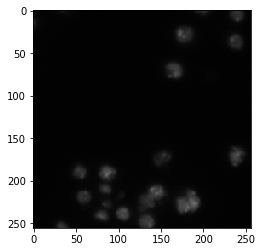

In [22]:
print("Image: ")
plt.imshow(im)
plt.show()

Image ID: 27619


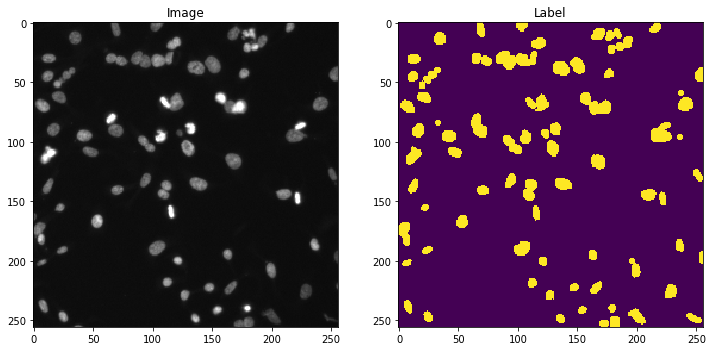

Image ID: 27165


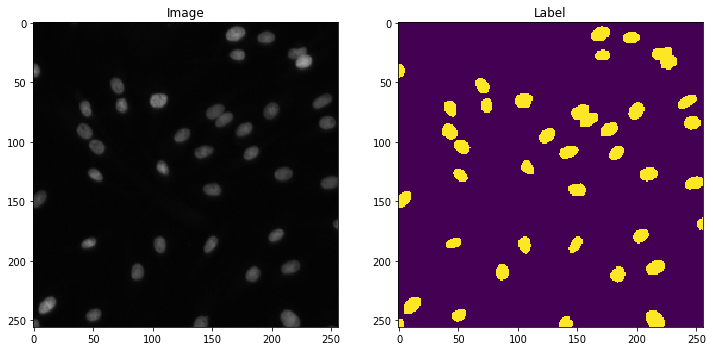

Image ID: 9939


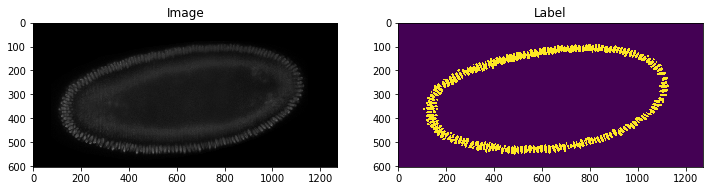

Image ID: 9464


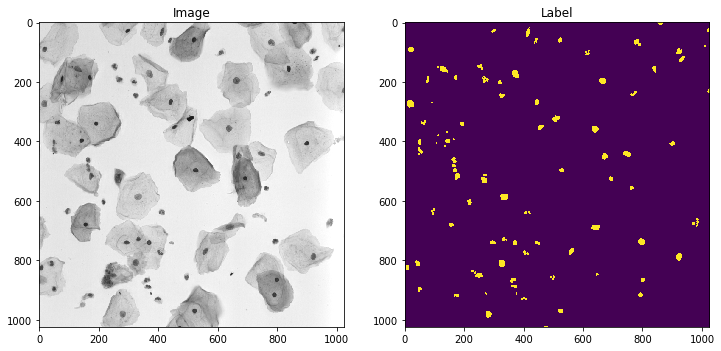

Image ID: 22933


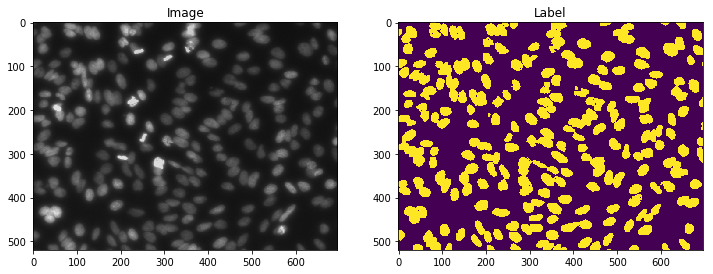

Image ID: 4405


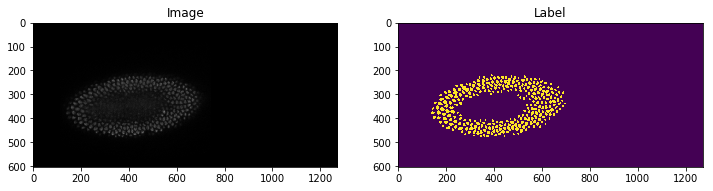

Image ID: 195


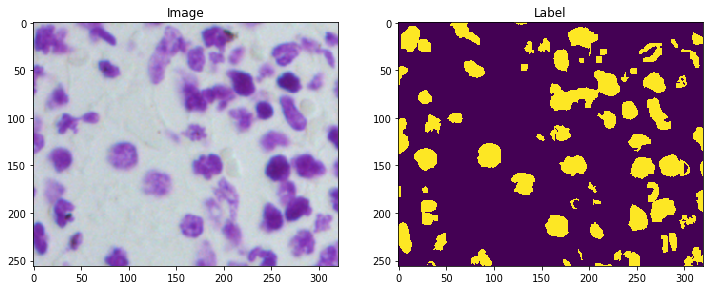

Image ID: 21785


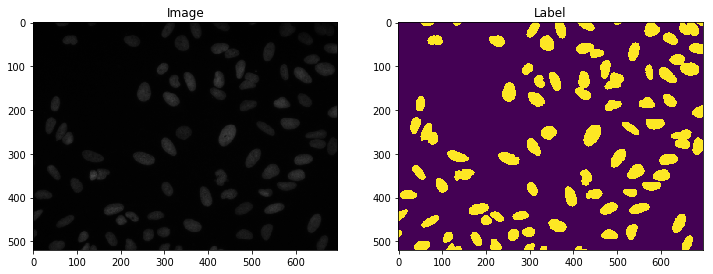

In [209]:
def image_and_mask(idx):
    """
    Displays the masks corersponding to id
    """
    img = mpimg.imread("Data/stage1_train/" + idx + "/images/" + idx + ".png")
    
    f = os.listdir("Data/stage1_train/"+idx+"/masks")[0]
    joinMask = mpimg.imread("Data/stage1_train/"+idx+"/masks/"+f)
    
    for m in os.listdir("Data/stage1_train/"+idx+"/masks")[1:]:
        joinMask += mpimg.imread("Data/stage1_train/"+idx+"/masks/"+m)
    
    return img, joinMask

for ind in train_labels.sample(8)["ImageId"].index:
    print("Image ID:", ind)        
    fig, ax = plt.subplots(ncols=2, figsize = (12, 6))
    display_img, display_mask = image_and_mask(train_labels.iloc[ind,0])
    ax[0].imshow(display_img)    
    ax[0].set_title('Image')
    ax[1].imshow(display_mask)
    ax[1].set_title("Label")
    plt.show()

Check the label 

In [211]:
train_labels = pd.read_csv("Data/stage1_train_labels.csv")
train_labels.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [212]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29461 entries, 0 to 29460
Data columns (total 2 columns):
ImageId          29461 non-null object
EncodedPixels    29461 non-null object
dtypes: object(2)
memory usage: 460.4+ KB


In [213]:
all_images = glob(os.path.join("Data", 'stage1_train', '*', '*', '*'))
img_df = pd.DataFrame({'path': all_images})
img_id = lambda in_path: in_path.split('\\')[-3]
img_type = lambda in_path: in_path.split('\\')[-2]
img_group = lambda in_path: in_path.split('\\')[-4].split('_')[1]
img_stage = lambda in_path: in_path.split('\\')[-4].split('_')[0]

In [214]:
img_df['ImageId'] = img_df['path'].map(img_id)
img_df['ImageType'] = img_df['path'].map(img_type)
img_df['TrainingSplit'] = img_df['path'].map(img_group)
img_df['Stage'] = img_df['path'].map(img_stage)

In [215]:
img_df.sample(3)

,path,ImageId,ImageType,TrainingSplit,Stage
47,Data\stage1_train\003cee89357d9fe13516167fd67b...,003cee89357d9fe13516167fd67b609a164651b2193458...,masks,train,stage1
23173,Data\stage1_train\c04fa1a74a980d790ba6f3e595fd...,c04fa1a74a980d790ba6f3e595fd9851f14370bb71c7cb...,masks,train,stage1
18414,Data\stage1_train\9bb6e39d5f4415bc7554842ee5d1...,9bb6e39d5f4415bc7554842ee5d1280403a602f2ba5612...,masks,train,stage1


In [216]:
%%time
#train_df = img_df.query('TrainingSplit=="train"')
train_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    train_rows += [c_row]
train_img_df = pd.DataFrame(train_rows)    
IMG_CHANNELS = 3

def read_and_stack(in_img_list):
    return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0
train_img_df['images'] = train_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
train_img_df['masks'] = train_img_df['masks'].map(read_and_stack).map(lambda x: x.astype(int))

Wall time: 1min 31s


In [217]:
print("Counting unique image shapes.")
train_img_df['images'].map(lambda x: x.shape).value_counts()

Counting unique image shapes.


(256, 256, 3)      334
(256, 320, 3)      112
(520, 696, 3)       92
(360, 360, 3)       91
(1024, 1024, 3)     16
(512, 640, 3)       13
(603, 1272, 3)       6
(260, 347, 3)        5
(1040, 1388, 3)      1
Name: images, dtype: int64

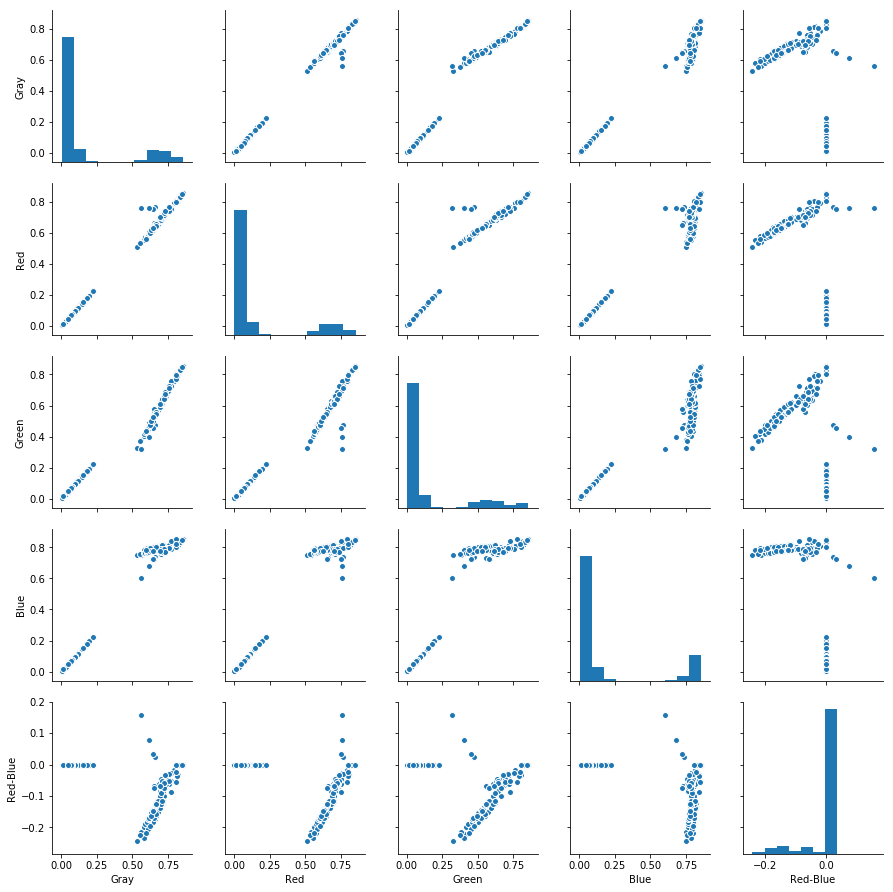

In [218]:
train_img_df['Red'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]))
train_img_df['Green'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,1]))
train_img_df['Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,2]))
train_img_df['Gray'] = train_img_df['images'].map(lambda x: np.mean(x))
train_img_df['Red-Blue'] = train_img_df['images'].map(lambda x: np.mean(x[:,:,0]-x[:,:,2]))
sns.pairplot(train_img_df[['Gray', 'Red', 'Green', 'Blue', 'Red-Blue']])

On average the red, green and blue channels have similar intensities for all images. It should be noted that the background can be dark (black) as  as well as light (white). 

## Neural Network Architecture - CNN

In [129]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import concatenate
from keras.utils import Progbar
from skimage.transform import resize

In [279]:
batch_size = 16
epochs = 10 # I keep this low because my laptop not strong enough to run in long time.

In [280]:
my_cnn_model = Sequential()
my_cnn_model.add(BatchNormalization(input_shape= (None, None, IMG_CHANNELS), 
                                name='NormalizeInput'))

my_cnn_model.add(Conv2D(8, kernel_size=(3, 3),activation='linear', padding='same'))
my_cnn_model.add(LeakyReLU(alpha=0.1))
my_cnn_model.add(Dropout(0.25))

my_cnn_model.add(Conv2D(8, (3, 3), activation='linear',padding='same'))
my_cnn_model.add(LeakyReLU(alpha=0.1))
my_cnn_model.add(Dropout(0.25))

my_cnn_model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))
my_cnn_model.add(LeakyReLU(alpha=0.1))                  
my_cnn_model.add(Dropout(0.4))

my_cnn_model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))
my_cnn_model.add(LeakyReLU(alpha=0.1))                  
my_cnn_model.add(Dropout(0.4))


# the final processing
my_cnn_model.add(Conv2D(16, activation='linear', kernel_size = (1,1), padding = 'same'))
my_cnn_model.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))

# check the summary of network
my_cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_227 (Conv2D)          (None, None, None, 8)     224       
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, None, None, 8)     0         
_________________________________________________________________
dropout_77 (Dropout)         (None, None, None, 8)     0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, None, None, 8)     584       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, None, None, 8)     0         
_________________________________________________________________
dropout_78 (Dropout)         (None, None, None, 8)     0         
__________

Define the dice_coefficient and its loss function. The dice_coefficient is also the metric in this case: <br>
Since we are being evaulated with intersection over union we can use the inverse of the DICE score as the loss function to optimize

In [254]:
from keras import backend as K
smooth = 1.
# metric function
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# loss function
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [255]:
# Define IoU metric
import tensorflow as tf
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec))

In [281]:
# Compile the model
my_cnn_model.compile(optimizer = keras.optimizers.Adam(), 
                    loss = 'binary_crossentropy',                    
                    metrics = [dice_coef, 'acc', 'mse', mean_iou])

In [225]:
# Preprocess data for training on neural network
def read_train_data(IMG_WIDTH=256, IMG_HEIGHT=256, IMG_CHANNELS=3):
    X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    print('Getting and resizing train images and masks ... ')
    for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
        path = TRAIN_PATH + id_
        img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train[n] = img
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
        for mask_file in next(os.walk(path + '/masks/'))[2]:
            mask_ = imread(path + '/masks/' + mask_file)
            mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), 
                                          mode='constant', 
                                          preserve_range=True), axis=-1)
            mask = np.maximum(mask, mask_)
        Y_train[n] = mask        
    return X_train,Y_train

In [226]:
# get train_data
train_img,train_mask = read_train_data()

Getting and resizing train images and masks ... 


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [03:28<00:00,  3.22it/s]


In [282]:
# Train the model
my_train_model = my_cnn_model.fit(train_img, 
                                  train_mask, 
                                  batch_size=batch_size,
                                  validation_split=0.1, 
                                  epochs=epochs)

Train on 603 samples, validate on 67 samples
Epoch 1/10
603/603 [==============================] - 41s 67ms/step - loss: 0.4595 - dice_coef: 0.2471 - acc: 0.8018 - mean_squared_error: 0.1461 - mean_iou: 0.4112 - val_loss: 0.2910 - val_dice_coef: 0.2983 - val_acc: 0.8594 - val_mean_squared_error: 0.0878 - val_mean_iou: 0.4229
Epoch 2/10
603/603 [==============================] - 35s 58ms/step - loss: 0.3730 - dice_coef: 0.2702 - acc: 0.8478 - mean_squared_error: 0.1107 - mean_iou: 0.4240 - val_loss: 0.2714 - val_dice_coef: 0.3231 - val_acc: 0.8626 - val_mean_squared_error: 0.0817 - val_mean_iou: 0.4239
Epoch 3/10
603/603 [==============================] - 35s 57ms/step - loss: 0.3484 - dice_coef: 0.2976 - acc: 0.8547 - mean_squared_error: 0.1043 - mean_iou: 0.4248 - val_loss: 0.2547 - val_dice_coef: 0.3614 - val_acc: 0.8732 - val_mean_squared_error: 0.0803 - val_mean_iou: 0.4256
Epoch 4/10
603/603 [==============================] - 35s 58ms/step - loss: 0.3348 - dice_coef: 0.3375 - acc:

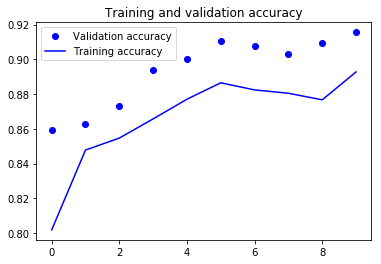

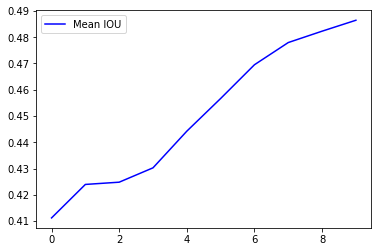

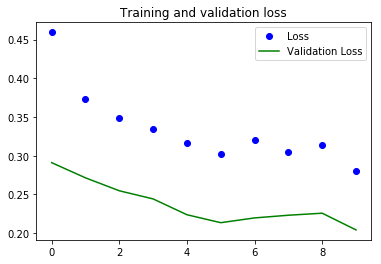

In [285]:
plt.title('Training and validation accuracy')
accuracy = my_train_model.history['acc']
val_accuracy = my_train_model.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.legend()
#plt.figure()
plt.show()

mean_iou = my_train_model.history['mean_iou']
plt.plot(epochs, mean_iou, 'b', label='Mean IOU')
#plt.title('Training and validation accuracy')
plt.legend()
#plt.figure()
plt.show()


loss = my_train_model.history['loss']
val_loss = my_train_model.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [122]:
# Function to read test images and return as numpy array
def read_test_data(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=3):
    X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    sizes_test = []
    print('\nGetting and resizing test images ... ')
    for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
        path = TEST_PATH + id_
        img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
        sizes_test.append([img.shape[0], img.shape[1]])
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_test[n] = img       
    return X_test,sizes_test

In [123]:
test_img,test_img_sizes = read_test_data()


Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 46.93it/s]


In [ ]:
# Predict on test
preds_test = my_model.predict(test_img, verbose=1)

# Threshold predictions
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

### Using the UNET model

U-net model is convolution network architecture, that work fast and precise segmentation of images.<br>
More information of this model can be read from here: 
https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/

![Image of Yaktocat](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [287]:
# I will try to keep the original size of image
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [288]:
# Build U-Net model
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# normalized the pixel intensity values are being to a 0.0 - 1.0 range(instead of 0 - 255)
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

unet_model = Model(inputs=[inputs], outputs=[outputs])

unet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
lambda_10 (Lambda)              (None, 256, 256, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_233 (Conv2D)             (None, 256, 256, 16) 448         lambda_10[0][0]                  
__________________________________________________________________________________________________
dropout_81 (Dropout)            (None, 256, 256, 16) 0           conv2d_233[0][0]                 
__________________________________________________________________________________________________
conv2d_234

In [ ]:
# Compile the model
unet_model.compile(optimizer = keras.optimizers.Adam(), 
                   loss = dice_coef_loss, 
                   metrics = [dice_coef, 'acc', 'mse'])

### Fit model

In [290]:
train_unet_model = unet_model.fit(train_img, 
                                train_mask, 
                                validation_split=0.1, 
                                batch_size=10, 
                                epochs=10)

Train on 603 samples, validate on 67 samples
Epoch 1/10
603/603 [==============================] - 76s 127ms/step - loss: -0.5173 - dice_coef: 0.5173 - acc: 0.7495 - mean_squared_error: 0.2262 - val_loss: -0.7016 - val_dice_coef: 0.7016 - val_acc: 0.8848 - val_mean_squared_error: 0.1135
Epoch 2/10
603/603 [==============================] - 77s 127ms/step - loss: -0.6260 - dice_coef: 0.6260 - acc: 0.8138 - mean_squared_error: 0.1844 - val_loss: -0.7173 - val_dice_coef: 0.7173 - val_acc: 0.8887 - val_mean_squared_error: 0.1099
Epoch 3/10
603/603 [==============================] - 76s 127ms/step - loss: -0.6296 - dice_coef: 0.6296 - acc: 0.8170 - mean_squared_error: 0.1814 - val_loss: -0.6962 - val_dice_coef: 0.6962 - val_acc: 0.8826 - val_mean_squared_error: 0.1159
Epoch 4/10
603/603 [==============================] - 77s 127ms/step - loss: -0.6357 - dice_coef: 0.6357 - acc: 0.8259 - mean_squared_error: 0.1724 - val_loss: -0.7150 - val_dice_coef: 0.7150 - val_acc: 0.8834 - val_mean_squar

#### Make Pred

In [ ]:
# Predict on train, val and test
preds_train = train_unet_model.predict(train_img[:int(train_img.shape[0]*0.9)], verbose=1)
preds_val = train_unet_model.predict(train_img[int(train_img.shape[0]*0.9):], verbose=1)
preds_test = train_unet_model.predict(test_img, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [ ]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()